## 주성분 분석(PCA)

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA   # 모델 클래스 선택
import seaborn as sns; sns.set()

In [7]:
rng = np.random.RandomState(1)
rng.rand(2,2)     # 0, 1 사이의 균일 분포
rng.randn(2,200)  # 가우시안 표준 정규 분포

array([[ -5.28171752e-01,  -1.07296862e+00,   8.65407629e-01,
         -2.30153870e+00,   1.74481176e+00,  -7.61206901e-01,
          3.19039096e-01,  -2.49370375e-01,   1.46210794e+00,
         -2.06014071e+00,  -3.22417204e-01,  -3.84054355e-01,
          1.13376944e+00,  -1.09989127e+00,  -1.72428208e-01,
         -8.77858418e-01,   4.22137467e-02,   5.82815214e-01,
         -1.10061918e+00,   1.14472371e+00,   9.01590721e-01,
          5.02494339e-01,   9.00855949e-01,  -6.83727859e-01,
         -1.22890226e-01,  -9.35769434e-01,  -2.67888080e-01,
          5.30355467e-01,  -6.91660752e-01,  -3.96753527e-01,
         -6.87172700e-01,  -8.45205641e-01,  -6.71246131e-01,
         -1.26645989e-02,  -1.11731035e+00,   2.34415698e-01,
          1.65980218e+00,   7.42044161e-01,  -1.91835552e-01,
         -8.87628964e-01,  -7.47158294e-01,   1.69245460e+00,
          5.08077548e-02,  -6.36995647e-01,   1.90915485e-01,
          2.10025514e+00,   1.20158952e-01,   6.17203110e-01,
        

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T  # 2X2  *  2*200 => (2*200).T
X

array([[ -6.25301618e-01,  -1.70063657e-01],
       [  9.60695033e-01,   5.90900597e-01],
       [ -5.98543385e-01,  -4.02593393e-01],
       [ -2.22805938e+00,  -5.32576740e-01],
       [ -4.61430060e-01,  -4.98867244e-01],
       [ -9.58929028e-01,  -2.69331024e-01],
       [ -6.73079909e-01,  -3.38308547e-01],
       [  1.30501861e+00,   5.91357846e-01],
       [  3.74545597e-01,  -9.85442049e-02],
       [ -1.82628627e+00,  -4.06170254e-01],
       [  6.68262284e-01,   3.36877396e-01],
       [ -5.82646676e-01,  -1.77369217e-01],
       [ -4.18128976e-01,  -3.73811389e-01],
       [  1.72209371e-01,   2.64668836e-01],
       [  3.77116687e-01,   1.88442969e-01],
       [ -6.79396230e-01,  -1.31601978e-01],
       [  1.03148960e+00,   4.25550018e-01],
       [  3.36041799e-01,   3.90982721e-02],
       [  7.05745985e-01,   4.88730649e-01],
       [  8.39511547e-01,   1.52125872e-01],
       [  1.49882898e+00,   4.71380809e-01],
       [  2.88356638e-01,   3.31334714e-02],
       [ -

(-2.7378957575985226,
 2.5788989913065881,
 -0.94549527304399739,
 1.0172909457553052)

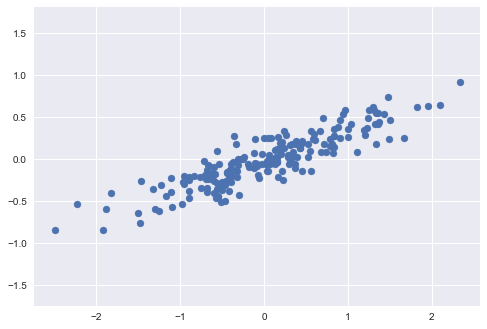

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')

In [15]:
pca = PCA(1)
pca.fit(X)
X_pca = pca.transform(X)
print("orig shape: {}".format(X.shape))
print("transformed shape : {}".format(X_pca.shape))

orig shape: (200, 2)
transformed shape : (200, 1)


### 변환된 데이터와 원본 데이터 그래프 그래기

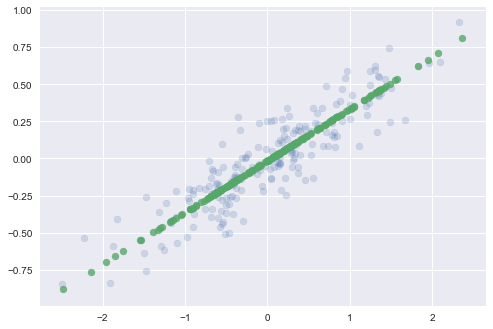

In [20]:
X_new = pca.inverse_transform(X_pca)   # 차원 축소된 데이터를 역변환
plt.scatter(X[:,0], X[:,1], alpha=0.2)
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.8)
# plt.axis('equal')   # x와 y의 동일한 증분이 같은 길이가 되도록 x 또는 y축의 한계를 변경.
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html
# 

In [21]:
# PCA 차원 축소- 가장 중요하지 않은 주축을 따르는 정보는 삭제하고, 가장 높은 분산을 갖는
# 데이터의 성분만을 남긴다.

### PCA를 사용한 시각화: 손으로 쓴 숫자

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape   # 1797개의 데이터 64차원

(1797, 64)

In [24]:
pca = PCA(2)  # 64차원에서 2차원으로 변경
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


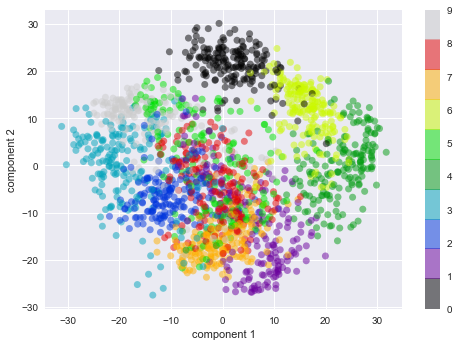

In [25]:
plt.scatter(projected[:,0], projected[:,1],
           c=digits.target, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();